# A data science approach on retail product placement and consumer behaviour using traingulation

The aim for this research is to hep managers/ owners of supermarkets or any retail food outlet to better understand their market and conusmer behaviour. This would help in making informed descions on inventory, product plaecment, promotions etc. and increase oparational efficiency.

## Data set

- Market_Basket.csv
- https://www.kaggle.com/datasets/devchauhan1/market-basket-optimisationcsv/data, 
- Dataset was collected from kaggle on April 2024. 
- This dataset includes individual items rather than product lines and it is simplified. 
- Althought there are other dataseta publically available it would have been difficult to conduct analysis as data is not specific, extensive data cleaning and transformation was required or given non-uniform results as dataset was synthetic. Private datasets were not an option as it was difficult to obtain.

## Market Basket Analysis

A data mining technique that is used to uncover purchase patterns in retail. Association rules used to predict the liklihood of items being purchased togehter leading to cross-selling.

## Metrics

**Support**
- Measures how frequently a specific item or group of items appears in transactions, offering important information about how well-liked they are among clients.
- Shows how often an item or item set appears in the dataset.
- How popular or common an item or combination of items is.

**Confidence**
- Confidence is essential as it offers information about the probability of customers buying a certain item based on their previous purchases
- Measures how often items in B appear in transactions that also contain A, the likelihood thet B is bough when A is bought.
- If A then B rule

**Lift**
- We can determine which product combinations are more likely to be bought together than would be predicted by chance. This helps to discover areas where cross-selling and promotional activities might be used
- Compares the confidence of a rull to the expected likelihood of B happening by chance. It shows whether A and B appear together more than expected if they were independent.
- Similar to correlation, lift=1  means A and B are independent
- Greater than 1 suggests A and B appear together more than expected (positive correlation)
- Less than 1: Item A actually reduces the likelihood of B appearing(negative correlation)

**Zhang's Metric**
- Refined way to measure the strength of association rules in market basket analysis. Unlike traditional metrics like confidence or lift, Zhang's metric adjusts for the influence of item frequencies helping to avoid misleading associations caused by very common or very rare items.

**Conviction**
- Conviction is a metric used to measure the strength of an implication rule — like how strongly the presence of one item (A) implies the presence (or absence) of another item (B).
- Similar to correlation, conviction value of 1 means A and B are independent
- Greater than 1 suggests B is more likely to appear when A is present (positive correlation)
- Less than 1: Iem A actually reduces the likelihood of B appearing(negative /orrelation)
- The higher the conviction, the stronger relationship between A and B

# Experiment
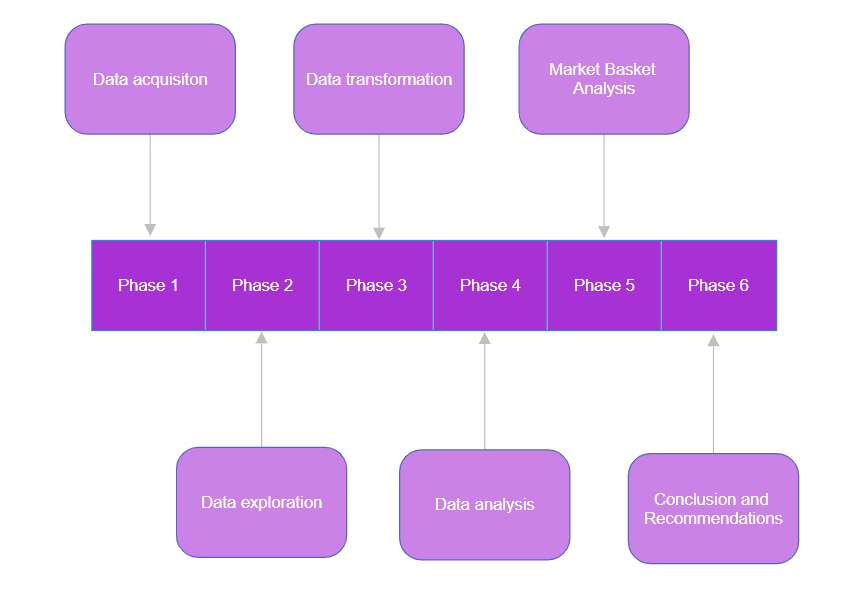


## Import and General Configuration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import warnings
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder

In [2]:
sns.set_style("darkgrid")
pd.set_option('display.max_columns', 75)
warnings.filterwarnings('ignore')

## Data Acquisition

In [3]:

# Load dataset
df = pd.read_csv('Market_Basket.csv',header=None)

# Preview structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [4]:
# Preview first few rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Preview last few rows
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset appears to be a complete dataset, the nulls represent that an item was not bought with another.

## Data exploration

In [6]:
#Statistcial overview
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


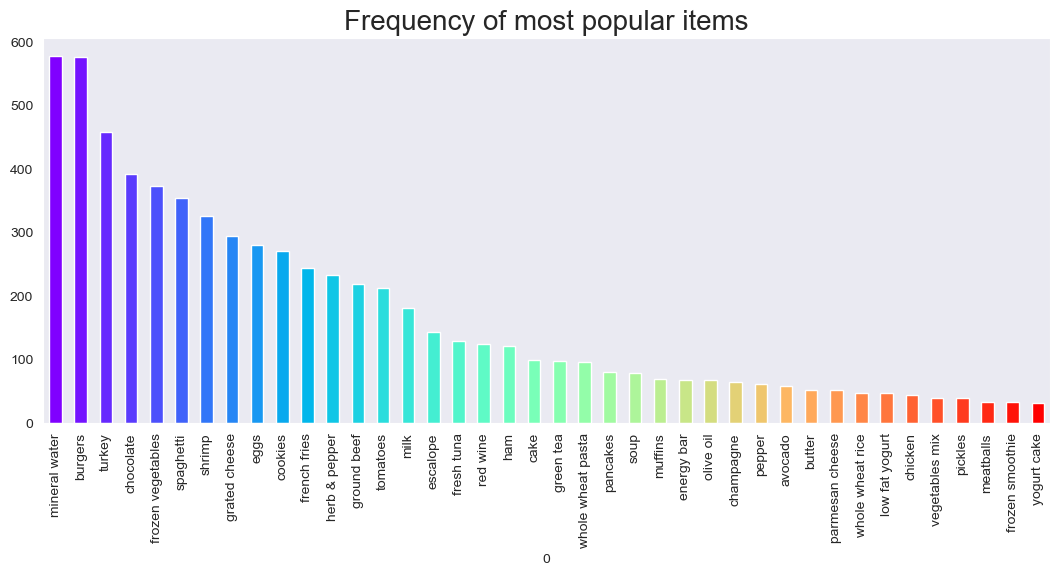

In [7]:
#Visual Exploration
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('Frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

Mineral water seems to be the most popular items in these transactions followed by burgers and turkey. Yogurt cake is the least popular item.

In [8]:
df = df.drop(columns=['food'], errors='ignore')

The column was interfering with the calculation of the metrics for market basket analysis. It was appearing as an item which was not the case.

In [9]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, len(df.columns))])

In [10]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil']]

In [11]:
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [12]:
print('# of items:',len(items))
print(list(items))

# of items: 121
['french fries', 'turkey', 'white wine', 'fresh tuna', 'shampoo', 'bacon', 'tomatoes', 'mashed potato', 'shrimp', 'water spray', 'burgers', 'whole wheat rice', 'gums', 'oatmeal', 'pancakes', 'grated cheese', 'burger sauce', 'hand protein bar', 'protein bar', 'parmesan cheese', 'energy bar', 'cream', 'extra dark chocolate', 'meatballs', 'escalope', 'tea', 'cottage cheese', 'whole wheat pasta', 'chocolate', 'eggplant', 'avocado', 'shallot', 'barbecue sauce', 'green grapes', 'candy bars', 'pet food', 'cider', 'pasta', 'whole weat flour', 'zucchini', 'antioxydant juice', 'red wine', 'herb & pepper', 'almonds', 'eggs', 'light mayo', 'magazines', 'strawberries', 'pickles', 'light cream', 'body spray', 'hot dogs', 'dessert wine', 'nan', 'pepper', 'flax seed', 'mint green tea', 'soda', 'salt', 'ham', 'napkins', 'blueberries', 'mint', 'energy drink', 'cake', 'chutney', 'vegetables mix', ' asparagus', 'ketchup', 'champagne', 'muffins', 'low fat yogurt', 'melons', 'cooking oil', '

In [13]:
if 'nan' in items: items.remove('nan')
print(list(items))

['french fries', 'turkey', 'white wine', 'fresh tuna', 'shampoo', 'bacon', 'tomatoes', 'mashed potato', 'shrimp', 'water spray', 'burgers', 'whole wheat rice', 'gums', 'oatmeal', 'pancakes', 'grated cheese', 'burger sauce', 'hand protein bar', 'protein bar', 'parmesan cheese', 'energy bar', 'cream', 'extra dark chocolate', 'meatballs', 'escalope', 'tea', 'cottage cheese', 'whole wheat pasta', 'chocolate', 'eggplant', 'avocado', 'shallot', 'barbecue sauce', 'green grapes', 'candy bars', 'pet food', 'cider', 'pasta', 'whole weat flour', 'zucchini', 'antioxydant juice', 'red wine', 'herb & pepper', 'almonds', 'eggs', 'light mayo', 'magazines', 'strawberries', 'pickles', 'light cream', 'body spray', 'hot dogs', 'dessert wine', 'pepper', 'flax seed', 'mint green tea', 'soda', 'salt', 'ham', 'napkins', 'blueberries', 'mint', 'energy drink', 'cake', 'chutney', 'vegetables mix', ' asparagus', 'ketchup', 'champagne', 'muffins', 'low fat yogurt', 'melons', 'cooking oil', 'corn', 'rice', 'toothpa

In [14]:
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 14280
[('french fries', 'turkey'), ('french fries', 'white wine'), ('french fries', 'fresh tuna'), ('french fries', 'shampoo'), ('french fries', 'bacon')]


In [15]:
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


## Data analysis

Calculating support, confidence, lift, conviction, association/disaccosiation rules and Zhang's metric

In [16]:
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()


,support
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911
chocolate,0.163845


In [17]:
support.tail()

,support
bramble,0.001866
cream,0.000933
napkins,0.000667
water spray,0.000400
asparagus,0.000133


In [18]:
support.loc['ground beef']

support    0.098254
Name: ground beef, dtype: float64

Was calculated for the analysis section of the write-up. To compare two items via thier support.

In [19]:

item_pairs = [(item1, item2) for idx, item1 in enumerate(onehot.columns) for item2 in onehot.columns[idx + 1:]]
support_values = {pair: np.logical_and(onehot[pair[0]], onehot[pair[1]]).mean() for pair in item_pairs}


In [20]:
top_pairs = sorted(support_values.items(), key=lambda x: x[1], reverse=True)[:10]

In [21]:
print("Top 10 Item Pairs with Highest Support:")
for pair, support in top_pairs:
    print(f"{pair[0]} and {pair[1]}: {support:.2f}")


Top 10 Item Pairs with Highest Support:
mineral water and spaghetti: 0.06
chocolate and mineral water: 0.05
eggs and mineral water: 0.05
milk and mineral water: 0.05
ground beef and mineral water: 0.04
chocolate and spaghetti: 0.04
ground beef and spaghetti: 0.04
eggs and spaghetti: 0.04
eggs and french fries: 0.04
frozen vegetables and mineral water: 0.04


In [22]:
confidence_values = {}
for pair in top_pairs:
    item1, item2 = pair[0]
    support_pair = pair[1]
    support_item1 = onehot[item1].mean()
    support_item2 = onehot[item2].mean()
    confidence_values[(item1, item2)] = support_pair / support_item1
    confidence_values[(item2, item1)] = support_pair / support_item2

In [23]:
print("Top 10 Food Item Pairs with Support and Confidence:")
for pair, support in top_pairs:
    confidence1 = confidence_values[(pair[0], pair[1])]
    confidence2 = confidence_values[(pair[1], pair[0])]
    print(f"{pair[0]} → {pair[1]}: Support = {support:.2f}, Confidence = {confidence1:.2f}")
    print(f"{pair[1]} → {pair[0]}: Support = {support:.2f}, Confidence = {confidence2:.2f}")


Top 10 Food Item Pairs with Support and Confidence:
mineral water → spaghetti: Support = 0.06, Confidence = 0.25
spaghetti → mineral water: Support = 0.06, Confidence = 0.34
chocolate → mineral water: Support = 0.05, Confidence = 0.32
mineral water → chocolate: Support = 0.05, Confidence = 0.22
eggs → mineral water: Support = 0.05, Confidence = 0.28
mineral water → eggs: Support = 0.05, Confidence = 0.21
milk → mineral water: Support = 0.05, Confidence = 0.37
mineral water → milk: Support = 0.05, Confidence = 0.20
ground beef → mineral water: Support = 0.04, Confidence = 0.42
mineral water → ground beef: Support = 0.04, Confidence = 0.17
chocolate → spaghetti: Support = 0.04, Confidence = 0.24
spaghetti → chocolate: Support = 0.04, Confidence = 0.23
ground beef → spaghetti: Support = 0.04, Confidence = 0.40
spaghetti → ground beef: Support = 0.04, Confidence = 0.23
eggs → spaghetti: Support = 0.04, Confidence = 0.20
spaghetti → eggs: Support = 0.04, Confidence = 0.21
eggs → french frie

In [24]:
lift_values = {}
for pair in top_pairs:
    item1, item2 = pair[0]
    support_pair = pair[1]
    lift_values[(item1, item2)] = confidence_values[(item1, item2)] / support_item2
    lift_values[(item2, item1)] = confidence_values[(item2, item1)] / support_item1

In [25]:
print("Top 10 Food Item Pairs with Lift:")
for pair, support in top_pairs:
    lift1 = lift_values[(pair[0], pair[1])]
    lift2 = lift_values[(pair[1], pair[0])]
    print(f"{pair[0]} → {pair[1]}:  Lift = {lift1:.2f}")
    print(f"{pair[1]} → {pair[0]}:  Lift = {lift2:.2f}")


Top 10 Food Item Pairs with Lift:
mineral water → spaghetti:  Lift = 1.05
spaghetti → mineral water:  Lift = 3.60
chocolate → mineral water:  Lift = 1.35
mineral water → chocolate:  Lift = 2.32
eggs → mineral water:  Lift = 1.19
mineral water → eggs:  Lift = 2.24
milk → mineral water:  Lift = 1.55
mineral water → milk:  Lift = 2.11
ground beef → mineral water:  Lift = 1.75
mineral water → ground beef:  Lift = 1.80
chocolate → spaghetti:  Lift = 1.00
spaghetti → chocolate:  Lift = 2.36
ground beef → spaghetti:  Lift = 1.67
spaghetti → ground beef:  Lift = 2.36
eggs → spaghetti:  Lift = 0.85
spaghetti → eggs:  Lift = 2.20
eggs → french fries:  Lift = 0.85
french fries → eggs:  Lift = 2.23
frozen vegetables → mineral water:  Lift = 1.57
mineral water → frozen vegetables:  Lift = 1.57


In [26]:

conviction_values = {}
for pair in top_pairs:
    item1, item2 = pair[0]
    support_pair = pair[1]
    conviction_values[(item1, item2)] = (1 - support_item2) / (1 - confidence_values[(item1, item2)]) if confidence_values[(item1, item2)] < 1 else np.inf
    conviction_values[(item2, item1)] = (1 - support_item1) / (1 - confidence_values[(item2, item1)]) if confidence_values[(item2, item1)] < 1 else np.inf
    

In [27]:
print("Top 10 Food Item Pairs with Conviction:")
for pair, support in top_pairs:
    conviction1 = conviction_values[(pair[0], pair[1])]
    conviction2 = conviction_values[(pair[1], pair[0])]
    print(f"{pair[0]} → {pair[1]}: Conviction = {conviction1:.2f}")
    print(f"{pair[1]} → {pair[0]}: Conviction = {conviction2:.2f}")


Top 10 Food Item Pairs with Conviction:
mineral water → spaghetti: Conviction = 1.02
spaghetti → mineral water: Conviction = 1.38
chocolate → mineral water: Conviction = 1.12
mineral water → chocolate: Conviction = 1.16
eggs → mineral water: Conviction = 1.06
mineral water → eggs: Conviction = 1.15
milk → mineral water: Conviction = 1.21
mineral water → milk: Conviction = 1.13
ground beef → mineral water: Conviction = 1.31
mineral water → ground beef: Conviction = 1.09
chocolate → spaghetti: Conviction = 1.00
spaghetti → chocolate: Conviction = 1.17
ground beef → spaghetti: Conviction = 1.27
spaghetti → ground beef: Conviction = 1.17
eggs → spaghetti: Conviction = 0.96
spaghetti → eggs: Conviction = 1.14
eggs → french fries: Conviction = 0.96
french fries → eggs: Conviction = 1.15
frozen vegetables → mineral water: Conviction = 1.22
mineral water → frozen vegetables: Conviction = 1.06


In [28]:

association_values = {}
dissociation_values = {}
results=[]
for pair in top_pairs:
    item1, item2 = pair[0]
    support_pair = pair[1]
    association_values[(item1, item2)] = support_pair / (support_item1 * support_item2)
    association_values[(item2, item1)] = support_pair / (support_item1 * support_item2)
    dissociation_values[(item1, item2)] = 1 - association_values[(item1, item2)]
    dissociation_values[(item2, item1)] = 1 - association_values[(item2, item1)]
    results.append((item1, item2, support_pair, association_values[(item1, item2)], dissociation_values[(item1, item2)],))


In [29]:
print("Top 10 Food Item Pairs with Association, and Dissociation:")
for pair, support in top_pairs:
    association1 = association_values[(pair[0], pair[1])]
    association2 = association_values[(pair[1], pair[0])]
    dissociation1 = dissociation_values[(pair[0], pair[1])]
    dissociation2 = dissociation_values[(pair[1], pair[0])]
    print(f"{pair[0]} → {pair[1]}: Association = {association1:.2f}, Dissociation = {dissociation1:.2f}")
    print(f"{pair[1]} → {pair[0]}: Association = {association2:.2f}, Dissociation = {dissociation2:.2f}")

Top 10 Food Item Pairs with Association, and Dissociation:
mineral water → spaghetti: Association = 2.63, Dissociation = -1.63
spaghetti → mineral water: Association = 2.63, Dissociation = -1.63
chocolate → mineral water: Association = 2.32, Dissociation = -1.32
mineral water → chocolate: Association = 2.32, Dissociation = -1.32
eggs → mineral water: Association = 2.24, Dissociation = -1.24
mineral water → eggs: Association = 2.24, Dissociation = -1.24
milk → mineral water: Association = 2.11, Dissociation = -1.11
mineral water → milk: Association = 2.11, Dissociation = -1.11
ground beef → mineral water: Association = 1.80, Dissociation = -0.80
mineral water → ground beef: Association = 1.80, Dissociation = -0.80
chocolate → spaghetti: Association = 1.73, Dissociation = -0.73
spaghetti → chocolate: Association = 1.73, Dissociation = -0.73
ground beef → spaghetti: Association = 1.73, Dissociation = -0.73
spaghetti → ground beef: Association = 1.73, Dissociation = -0.73
eggs → spaghetti:

In [30]:
def zhang(antecedent, consequent):
    supportA = antecedent.mean()
    supportC = consequent.mean()
    supportAC = np.logical_and(antecedent, consequent).mean()
    numerator = supportAC - supportA * supportC
    denominator = max(supportAC * (1 - supportA), supportA * (supportC - supportAC))
    return numerator / denominator if denominator != 0 else 0

In [31]:

zhang_values = {}
results = []
for pair in top_pairs:
    item1, item2 = pair[0]
    support_pair = pair[1]
    zhang_values[(item1, item2)] = zhang(onehot[item1], onehot[item2])
    results.append((item1, item2, support_pair, association_values[(item1, item2)], dissociation_values[(item1, item2)], zhang_values[(item1, item2)]))

In [32]:
print("Top 10 Item Pairs with Zhang's Metric")
for item1, item2, support, association, dissociation, zhang_score in sorted(results, key=lambda x: x[5], reverse=True):
    print(f"{item1} → {item2}: Zhang = {zhang_score:.2f}")


Top 10 Item Pairs with Zhang's Metric
ground beef → spaghetti: Zhang = 0.62
ground beef → mineral water: Zhang = 0.47
milk → mineral water: Zhang = 0.41
frozen vegetables → mineral water: Zhang = 0.40
mineral water → spaghetti: Zhang = 0.40
chocolate → spaghetti: Zhang = 0.33
chocolate → mineral water: Zhang = 0.31
eggs → mineral water: Zhang = 0.19
eggs → french fries: Zhang = 0.19
eggs → spaghetti: Zhang = 0.17


In [33]:
top_pairs = sorted(support_values.items(), key=lambda x: x[1], reverse=True)

In [34]:
rules = []
antec_supp, cons_supp, suppt, conf, lft, conv, zhangs = [], [], [], [], [], [], []

# Compute metrics for the top pairs
for pair in top_pairs:
    item1, item2 = pair[0]
    support_pair = pair[1]
    support_item1 = onehot[item1].mean()
    support_item2 = onehot[item2].mean()
    confidence = support_pair / support_item1
    lift = support_pair / (support_item1 * support_item2)
    conviction = (1 - support_item2) / (1 - confidence) if (1 - confidence) != 0 else np.inf
    zhang_score = zhang(onehot[item1], onehot[item2])
    
    # Append to lists
    rules.append((item1, item2))
    antec_supp.append(support_item1)
    cons_supp.append(support_item2)
    suppt.append(support_pair)
    conf.append(confidence)
    lft.append(lift)
    conv.append(conviction)
    zhangs.append(zhang_score)

# Create DataFrame for rules
rules_df = pd.DataFrame(rules, columns=['Antecedents', 'Consequents'])
rules_df['Antecedent Support'] = antec_supp
rules_df['Consequent Support'] = cons_supp
rules_df['Support'] = suppt
rules_df['Confidence'] = conf
rules_df['Lift'] = lft
rules_df['Conviction'] = conv
rules_df['Zhangs Metric'] = zhangs

# Sort the DataFrame by Zhang's Metric in descending order and display
rules_df = rules_df.sort_values(by="Zhangs Metric", ascending=False)
print(rules_df)

          Antecedents        Consequents  Antecedent Support  \
5421          napkins            oatmeal            0.000667   
5425          napkins            shampoo            0.000667   
4559        asparagus         energy bar            0.000133   
5237  gluten free bar            napkins            0.006932   
4563        asparagus  whole wheat pasta            0.000133   
...               ...                ...                 ...   
6975          oatmeal           zucchini            0.004399   
6976              oil            pickles            0.023064   
6977              oil    sparkling water            0.023064   
6978              oil      strong cheese            0.023064   
6706             gums         white wine            0.013465   

      Consequent Support   Support  Confidence       Lift  Conviction  \
5421            0.004399  0.000133    0.200000  45.460606    1.244501   
5425            0.004933  0.000133    0.200000  40.545946    1.243834   
4559        

In [35]:
rules_df.describe()

,Antecedent Support,Consequent Support,Support,Confidence,Lift,Conviction,Zhangs Metric
count,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000,7140.000000
mean,0.032671,0.032560,0.001389,0.046239,1.475580,inf,-0.012532
std,0.042550,0.041839,0.003351,0.071487,1.879629,NaN,0.623177
min,0.000133,0.000400,0.000000,0.000000,0.000000,0.761632,-1.000000
25%,0.006932,0.007732,0.000133,0.004926,0.475787,0.995183,-0.534745
50%,0.014265,0.017464,0.000400,0.021944,1.236564,1.004126,0.200462
75%,0.033729,0.042528,0.001200,0.058140,1.874834,1.022178,0.483915
max,0.238368,0.238368,0.059725,1.000000,45.460606,inf,0.978655


In [36]:
rules_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7140 entries, 5421 to 6706
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Antecedents         7140 non-null   object 
 1   Consequents         7140 non-null   object 
 2   Antecedent Support  7140 non-null   float64
 3   Consequent Support  7140 non-null   float64
 4   Support             7140 non-null   float64
 5   Confidence          7140 non-null   float64
 6   Lift                7140 non-null   float64
 7   Conviction          7140 non-null   float64
 8   Zhangs Metric       7140 non-null   float64
dtypes: float64(7), object(2)
memory usage: 557.8+ KB


## Market basket analysis

In [37]:
rules_filtered = rules_df[(rules_df['Antecedent Support'] > 0.05) &
                          (rules_df['Consequent Support'] > 0.05) &
                          (rules_df['Conviction'] > 1.0) &
                          (rules_df['Lift'] >1.0)]

# Print remaining rules after filtering
print(f'# of rules before filtering = {len(rules_df)}')
print(f'# of rules after filtering = {len(rules_filtered)}')
print(rules_filtered.head())


# of rules before filtering = 7140
# of rules after filtering = 246
           Antecedents Consequents  Antecedent Support  Consequent Support  \
204          olive oil        soup            0.065858            0.050527   
81   frozen vegetables    tomatoes            0.095321            0.068391   
86                milk        soup            0.129583            0.050527   
73   frozen vegetables      shrimp            0.095321            0.071457   
35       mineral water        soup            0.238368            0.050527   

      Support  Confidence      Lift  Conviction  Zhangs Metric  
204  0.008932    0.135628  2.684280    1.098454       0.671697  
81   0.016131    0.169231  2.474464    1.121381       0.658656  
86   0.015198    0.117284  2.321232    1.075627       0.653933  
73   0.016664    0.174825  2.446574    1.125268       0.653563  
35   0.023064    0.096756  1.914955    1.051182       0.627330  


In [38]:
rules_filtered = rules_filtered[rules_filtered['Zhangs Metric'] > 0.65]

# Print rule
print(f'# of rules after filtering = {len(rules_filtered)}')
print(rules_filtered)

# of rules after filtering = 4
           Antecedents Consequents  Antecedent Support  Consequent Support  \
204          olive oil        soup            0.065858            0.050527   
81   frozen vegetables    tomatoes            0.095321            0.068391   
86                milk        soup            0.129583            0.050527   
73   frozen vegetables      shrimp            0.095321            0.071457   

      Support  Confidence      Lift  Conviction  Zhangs Metric  
204  0.008932    0.135628  2.684280    1.098454       0.671697  
81   0.016131    0.169231  2.474464    1.121381       0.658656  
86   0.015198    0.117284  2.321232    1.075627       0.653933  
73   0.016664    0.174825  2.446574    1.125268       0.653563  
